This is an analysis report on the [Superstore dataset](https://www.kaggle.com/datasets/jr2ngb/superstore-data) from kaggle.
It includes data pre-processing, data analysis and visualization.

The data analysis section is divided into 3 categories:
- Analysis across the entire dataset:
    - It consists of geography wise analysis, product category and sub-category wise analysis, sales analysis and also segment and mode type analysis.
- Analysis across the Loss dataframe:
    - An subset of loss data is created from the original dataset so that we can get a better view of the losses across different segments and also know which are the ones we should act on more urgently.
- Revenue wise analysis:
    - It gives us an overview of the revenue generated across different sections. Thus helping us to distinguish between our most and least profitable sections and take steps accordingly.

### Importing Libraries & Reading the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('superstore_dataset2011-2015.csv',encoding='latin-1')

# to view all the columns in the dataset
pd.set_option('display.max_columns', None)
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### Data Preprocessing

In [4]:
print('Data Shape: ', data.shape, '\n')
data.info()

Data Shape:  (51290, 24) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Prod

In [5]:
# replacing spaces in columns names with underscore
data.columns = data.columns.str.replace(' ','_')
print(data.columns.values)

# Checking for missing values
data.isnull().sum()

['Row_ID' 'Order_ID' 'Order_Date' 'Ship_Date' 'Ship_Mode' 'Customer_ID'
 'Customer_Name' 'Segment' 'City' 'State' 'Country' 'Postal_Code' 'Market'
 'Region' 'Product_ID' 'Category' 'Sub-Category' 'Product_Name' 'Sales'
 'Quantity' 'Discount' 'Profit' 'Shipping_Cost' 'Order_Priority']


Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       41296
Market                0
Region                0
Product_ID            0
Category              0
Sub-Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
dtype: int64

In [6]:
# dropping data with no postal code data
dataset = data.dropna(subset=['Postal_Code'])

#dropping columns we don't need
dataset = dataset.drop(['Row_ID','Customer_ID', 'Customer_Name'], axis=1)

In [7]:
print(f"data shape before dropping: {data.shape}")
print(f"data shape after dropping: {dataset.shape}")
dataset.head()

data shape before dropping: (51290, 24)
data shape after dropping: (9994, 21)


,Order_ID,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Country,Postal_Code,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
7,CA-2011-115161,1/2/2011,3/2/2011,First Class,Consumer,Mission Viejo,California,United States,92691.0,US,West,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
27,CA-2011-113880,1/3/2011,5/3/2011,Standard Class,Home Office,Elmhurst,Illinois,United States,60126.0,US,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.30,-172.1172,70.05,High
32,CA-2011-104269,1/3/2011,6/3/2011,Second Class,Consumer,Seattle,Washington,United States,98115.0,US,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.20,51.4764,47.89,Medium
34,CA-2011-168312,1/3/2011,7/3/2011,Standard Class,Consumer,Houston,Texas,United States,77036.0,US,Central,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509,3,0.30,-43.0296,32.70,Medium
36,CA-2011-131009,1/3/2011,5/3/2011,Standard Class,Consumer,El Paso,Texas,United States,79907.0,US,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250,6,0.30,0.0000,25.22,Medium


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 7 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Order_Date      9994 non-null   object 
 2   Ship_Date       9994 non-null   object 
 3   Ship_Mode       9994 non-null   object 
 4   Segment         9994 non-null   object 
 5   City            9994 non-null   object 
 6   State           9994 non-null   object 
 7   Country         9994 non-null   object 
 8   Postal_Code     9994 non-null   float64
 9   Market          9994 non-null   object 
 10  Region          9994 non-null   object 
 11  Product_ID      9994 non-null   object 
 12  Category        9994 non-null   object 
 13  Sub-Category    9994 non-null   object 
 14  Product_Name    9994 non-null   object 
 15  Sales           9994 non-null   float64
 16  Quantity        9994 non-null   int64  
 17  Discount        9994 non-null   

In [9]:
#Changing required dtypes

dataset[['Order_Date','Ship_Date']] = dataset[['Order_Date','Ship_Date']].astype('datetime64')
dataset['Postal_Code'] = dataset['Postal_Code'].astype('object')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 7 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        9994 non-null   object        
 1   Order_Date      9994 non-null   datetime64[ns]
 2   Ship_Date       9994 non-null   datetime64[ns]
 3   Ship_Mode       9994 non-null   object        
 4   Segment         9994 non-null   object        
 5   City            9994 non-null   object        
 6   State           9994 non-null   object        
 7   Country         9994 non-null   object        
 8   Postal_Code     9994 non-null   object        
 9   Market          9994 non-null   object        
 10  Region          9994 non-null   object        
 11  Product_ID      9994 non-null   object        
 12  Category        9994 non-null   object        
 13  Sub-Category    9994 non-null   object        
 14  Product_Name    9994 non-null   object        
 15  Sal

In [10]:
# Duplicates check
print(f"No. of duplicated data: {dataset.duplicated().sum()}")

No. of duplicated data: 0


In [11]:
# Missing Values
dataset.isnull().sum()

Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Segment           0
City              0
State             0
Country           0
Postal_Code       0
Market            0
Region            0
Product_ID        0
Category          0
Sub-Category      0
Product_Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_Cost     0
Order_Priority    0
dtype: int64

### Data Analysis

In [12]:
# Unique categories in the dataset
print("Categories:")
print(f"No. of Categories: {dataset['Category'].nunique()}")
print(f"No. of Sub-Categories: {dataset['Sub-Category'].nunique()}")

# Unique geographies
print("\nGeographies:")
print(f"No. of Unique Postal Codes: {dataset['Postal_Code'].nunique()}")
print(f"No. of Unique Cities: {dataset['City'].nunique()}")
print(f"No. of Unique States: {dataset['State'].nunique()}")
print(f"No. of Unique Region: {dataset['Region'].nunique()}")
print(f"No. of Unique Country: {dataset['Country'].nunique()}")
print(f"No. of Unique Market: {dataset['Market'].nunique()}")

Categories:
No. of Categories: 3
No. of Sub-Categories: 17

Geographies:
No. of Unique Postal Codes: 631
No. of Unique Cities: 531
No. of Unique States: 49
No. of Unique Region: 4
No. of Unique Country: 1
No. of Unique Market: 1


### Analysis across the entire dataset

#### Segment wise Analysis

Count Per Segment:


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

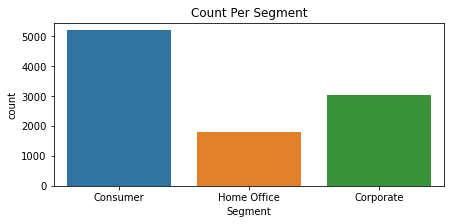

In [13]:
print("Count Per Segment:")
display(dataset['Segment'].value_counts())

plt.rcParams['figure.figsize']=(7,3)
plt.rcParams.update({'font.size':10})
sns.countplot(x=dataset.Segment)
plt.title("Count Per Segment")
plt.show();

In the Home Office Segment, we observe that the count is less. So convergent strategy and improvement is a necessity for this Segment.

In [14]:
dataset.sort_values(['Segment'], ascending=True).groupby("Segment").sum()

,Sales,Quantity,Discount,Profit,Shipping_Cost
Segment,,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092,120970.09
Corporate,7.061464e+05,11608,477.85,91979.1340,74295.39
Home Office,4.296531e+05,6744,262.33,60298.6785,42908.31


Here, though the Consumer Segment has the least sales, it also provides the maximum profit. So, if the sales can be increased in this segment then we can gain more profits.

#### State wise Analysis

In [15]:
# States from the entire dataset with least sales
dataset.groupby(['State']).sum()['Sales'].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

This are the 10 states with the least sales in the entire dataset. These are the states where improvement measures should be taken.

#### Ship Mode wise Analysis

,Sales,Quantity,Discount,Profit,Shipping_Cost
Ship_Mode,,,,,
Same Day,1.283631e+05,1960,82.75,15891.7589,22988.37
First Class,3.514284e+05,5693,253.17,48969.8399,54704.88
Second Class,4.591936e+05,7423,270.15,57446.6354,55016.00
Standard Class,1.358216e+06,22797,955.02,164088.7875,105464.54


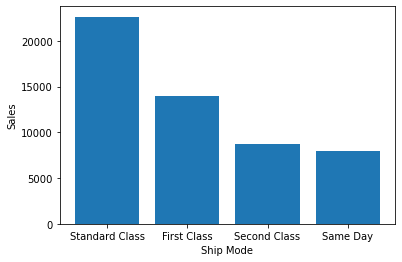

In [16]:
display(dataset.groupby('Ship_Mode').sum().sort_values(by='Sales'))

# Visualization
plt.rcParams['figure.figsize']=(6,4)
sorted_df = dataset.sort_values('Sales', ascending=False)
plt.bar(sorted_df['Ship_Mode'],sorted_df['Sales']);
plt.rcParams.update({'font.size':5});
plt.xlabel('Ship Mode');
plt.ylabel('Sales');

Here we observe that the sales are high if the ship mode is standard class, and sales are low if the ship mode is either second class or same day.

#### Region wise Analysis

In [17]:
dataset.groupby(['Region']).sum()

,Sales,Quantity,Discount,Profit,Shipping_Cost
Region,,,,,
Central,501239.8908,8780,558.34,39706.3625,48857.73
East,678781.2400,10618,414.00,91522.7800,72743.62
South,391721.9050,6209,238.55,46749.4303,40060.18
West,725457.8245,12266,350.20,108418.4489,76512.26


- Here we can see that the South Region has the least sales. So, for better profit we should focus on this region. 
- Also the West Region provides the Maximum profit and the has the most sales.

#### Sub-Category wise Analysis

,Sales,Quantity,Discount,Profit,Shipping_Cost
Sub-Category,,,,,
Fasteners,3024.2800,914,17.80,949.5182,302.03
Labels,12486.3120,1400,25.00,5546.2540,1248.37
Envelopes,16476.4020,906,20.40,6964.1767,1876.31
Art,27118.7920,3000,59.60,6527.7870,3032.85
Supplies,46673.5380,647,14.60,-1189.0995,3598.69
Paper,78479.2060,5178,102.60,34053.5693,8652.53
Furnishings,91705.1640,3563,132.40,13059.1436,10071.49
Appliances,107532.1610,1729,77.60,18138.0054,12591.54
Bookcases,114879.9963,868,48.14,-3472.5560,11681.43


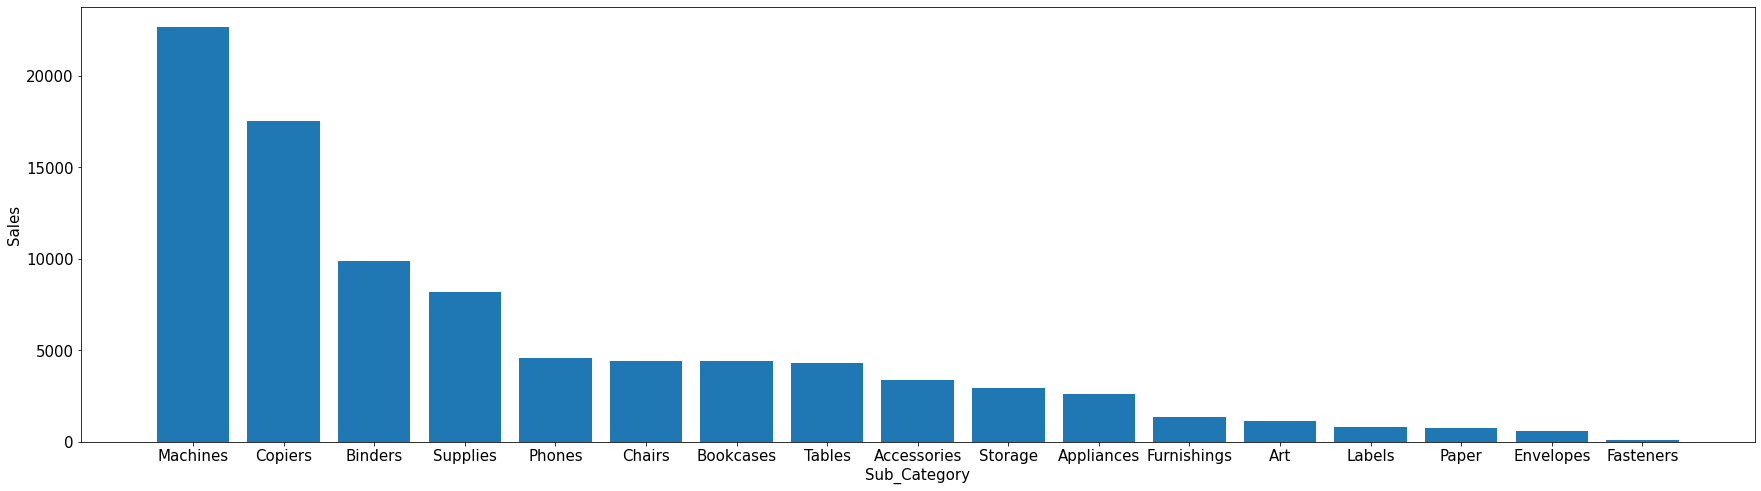

In [19]:
# Loss per Sub-Category for the entire dataset
display(dataset.groupby('Sub-Category').sum().sort_values(by='Sales'))

# Visualization
plt.rcParams['figure.figsize']=(30,8)
sorted_df = dataset.sort_values('Sales', ascending=False)
plt.bar(sorted_df['Sub-Category'],sorted_df['Sales']);
plt.rcParams.update({'font.size':15});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

When comparing the overall dataset, we can see that Fasteners, Envelops, Paper, Labels and Art are the bottom 5 categories in sales

### Creating a Loss dataframe
- helps to look deeper into the sales
- will let us know which areas need improvement

In [20]:
loss_df = dataset[dataset['Profit']<0]
print("Shape: ", loss_df.shape)
loss_df.head(5)

Shape:  (1871, 21)


,Order_ID,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Country,Postal_Code,Market,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
27,CA-2011-113880,2011-01-03,2011-05-03,Standard Class,Home Office,Elmhurst,Illinois,United States,60126.0,US,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.3,-172.1172,70.05,High
34,CA-2011-168312,2011-01-03,2011-07-03,Standard Class,Consumer,Houston,Texas,United States,77036.0,US,Central,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509,3,0.3,-43.0296,32.70,Medium
52,CA-2011-131009,2011-01-03,2011-05-03,Standard Class,Consumer,El Paso,Texas,United States,79907.0,US,Central,OFF-ST-10001469,Office Supplies,Storage,Fellowes Bankers Box Recycled Super Stor/Drawer,129.552,3,0.2,-22.6716,8.00,Medium
53,CA-2011-131009,2011-01-03,2011-05-03,Standard Class,Consumer,El Paso,Texas,United States,79907.0,US,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,6,0.6,-34.9536,7.38,Medium
66,CA-2011-131009,2011-01-03,2011-05-03,Standard Class,Consumer,El Paso,Texas,United States,79907.0,US,Central,OFF-FA-10004395,Office Supplies,Fasteners,Plymouth Boxed Rubber Bands by Plymouth,18.840,5,0.2,-3.5325,2.05,Medium


In [21]:
loss_df.describe()

,Sales,Quantity,Discount,Profit,Shipping_Cost
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,250.511574,3.762694,0.480887,-83.448042,25.700460
std,715.067296,2.141347,0.235080,284.423422,57.266913
min,0.444000,1.000000,0.100000,-6599.978000,0.010000
25%,12.503000,2.000000,0.200000,-58.660950,1.090000
50%,71.088000,3.000000,0.400000,-18.088200,6.230000
75%,284.922000,5.000000,0.700000,-6.261500,26.570000
max,22638.480000,14.000000,0.800000,-0.089500,865.740000


In [22]:
# Getting the total loss
total_loss = np.negative(loss_df['Profit'].sum())
print("Total Loss: %.2f" %total_loss)

Total Loss: 156131.29


#### Segment wise Analysis

In [23]:
loss_df.groupby('Segment').sum()

,Sales,Quantity,Discount,Profit,Shipping_Cost
Segment,,,,,
Consumer,247196.2460,3651,476.76,-84945.7112,26635.01
Corporate,131860.5383,2191,272.00,-44787.2076,14222.17
Home Office,89650.3705,1198,150.98,-26398.3669,7228.38


According to the above data, more discounts lead to more losses. So, to make more profit fewer discounts should be provided.

#### Category wise Analysis

In [24]:
loss_df.groupby('Category').mean().sort_values(by='Profit')

,Sales,Quantity,Discount,Profit,Shipping_Cost
Category,,,,,
Technology,439.899974,3.553506,0.333579,-142.361322,36.165904
Furniture,361.184295,3.714286,0.367143,-85.344690,39.949188
Office Supplies,103.395796,3.865688,0.617607,-63.899840,11.016795


As per the data, The Technology Category has the maximum losses.

#### Sub-Category wise Analysis

,Sales,Quantity,Discount,Profit,Shipping_Cost
Sub-Category,,,,,
Binders,36140.6130,2456,452.40,-38510.4964,4008.48
Tables,104978.5460,757,74.15,-32412.1483,10852.79
Machines,72456.2530,157,25.60,-30118.6682,4997.03
Bookcases,48072.7408,422,37.99,-12152.2060,4808.38
Chairs,91988.4560,876,61.40,-9880.8413,11412.73
Appliances,3382.5340,235,53.60,-8629.6412,290.77
Phones,35797.8400,476,46.60,-7530.6235,3556.07
Furnishings,12845.8440,597,88.60,-6490.9134,1449.82
Storage,37869.0720,569,32.20,-6426.3038,4331.17


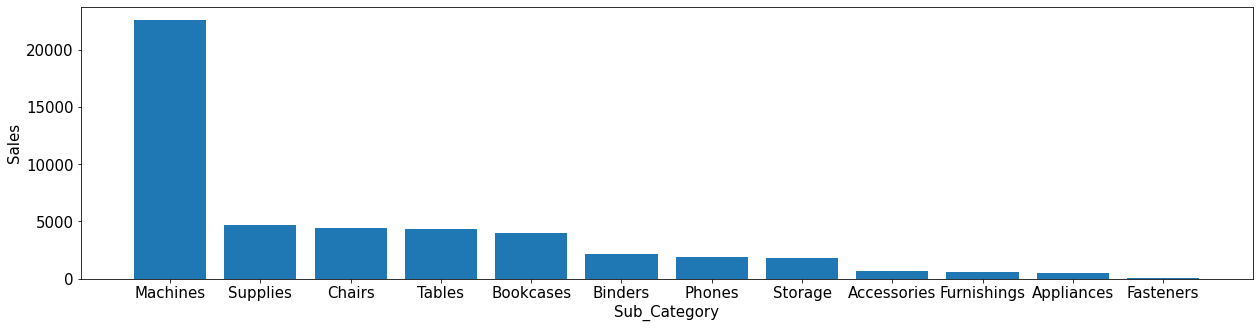

In [25]:
# Loss per Sub-Category
display(loss_df.groupby('Sub-Category').sum().sort_values(by='Profit'))

# Graph for Sales Loss per Sub-category
plt.rcParams['figure.figsize']=(21,5)
sorted_ldf = loss_df.sort_values('Sales', ascending=False)
plt.bar('Sub-Category','Sales',data=sorted_ldf);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

plt.show()

We can see that:
- Binders, Tables and Machines are the categories with maximum losses.
- The Quantity sold in Binders is more so even reducing the losses will not help with the losses. It's better to give more discounts on the categories that are getting less sold so that they will start getting sold more.
- We can see that the sales of Fasteners, Furnishings, Appliances and Accessories is very low.

#### City wise Analysis

In [26]:
print("Top 10 cities with highest losses: ")
loss_df.groupby('City').sum().sort_values('Profit', ascending=True).head(10)

Top 10 cities with highest losses: 


,Sales,Quantity,Discount,Profit,Shipping_Cost
City,,,,,
Philadelphia,70460.5510,892,115.30,-19590.7411,8047.70
Houston,37640.7304,683,104.14,-14785.3668,4148.88
Chicago,19910.0120,541,88.20,-11120.6271,2171.49
San Antonio,17395.1450,139,17.10,-7831.0254,1029.35
Lancaster,7699.2420,71,9.40,-7632.4946,816.53
Burlington,12044.8740,19,2.00,-5999.3318,1002.06
Dallas,9994.0562,280,39.30,-4208.5218,1128.53
Jacksonville,31146.2710,154,18.85,-4059.9857,709.66
New York City,19533.8020,132,12.20,-3966.0226,2520.40


### Correlation

,Sales,Quantity,Discount,Profit,Shipping_Cost
Sales,1.000000,0.200795,-0.028190,0.479064,0.677279
Quantity,0.200795,1.000000,0.008623,0.066253,0.221305
Discount,-0.028190,0.008623,1.000000,-0.219487,-0.030117
Profit,0.479064,0.066253,-0.219487,1.000000,0.283280
Shipping_Cost,0.677279,0.221305,-0.030117,0.283280,1.000000


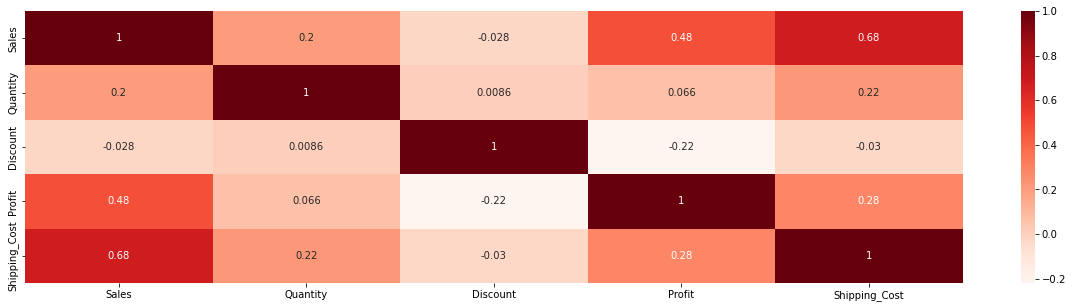

In [27]:
display(dataset.corr())
sns.heatmap(dataset.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)

From the heatmap we can conclude that:
- Sales & Profit are moderately correlated
- Profit & Discount are Negatively correlated

### Revenue Analysis

#### Region wise Analysis

In [28]:
reg = dataset.groupby('Region')['Sales'].sum().sort_values(ascending=False)
reg = reg.reset_index()

# Generating the labels to show sales values in K
reg['Sales_K'] = ['$ ' + str(round(int(f)/1000)) + ' K' for f in reg.Sales]

reg

,Region,Sales,Sales_K
0,West,725457.8245,$ 725 K
1,East,678781.2400,$ 679 K
2,Central,501239.8908,$ 501 K
3,South,391721.9050,$ 392 K


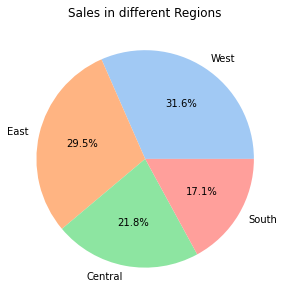

In [29]:
# Pie chart
plt.rcParams['figure.figsize']=(5,5)

colors = sns.color_palette('pastel')[0:5]
plt.pie(reg.Sales, labels=reg.Region, colors = colors, autopct='%1.1f%%')

plt.title("Sales in different Regions")
plt.show()

#### State wise Analysis

In [30]:
# State wise revenue - Top 10

st = dataset.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
st = st.reset_index()

# Generating the labels to show sales values in K
st['Sales_K'] = ['$ ' + str(round(int(f)/1000)) + ' K' for f in st.Sales]

st

,State,Sales,Sales_K
0,California,457687.6315,$ 458 K
1,New York,310876.2710,$ 311 K
2,Texas,170188.0458,$ 170 K
3,Washington,138641.2700,$ 139 K
4,Pennsylvania,116511.9140,$ 117 K
5,Florida,89473.7080,$ 89 K
6,Illinois,80166.1010,$ 80 K
7,Ohio,78258.1360,$ 78 K
8,Michigan,76269.6140,$ 76 K
9,Virginia,70636.7200,$ 71 K


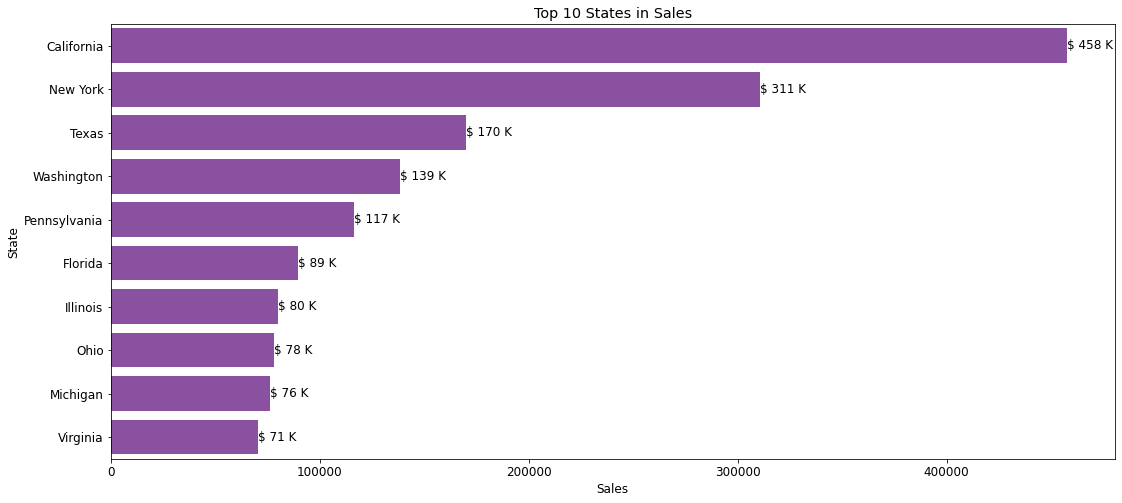

In [31]:
plt.rcParams['figure.figsize']=(18,8)
plt.rcParams.update({'font.size':12})
ax = sns.barplot(st.Sales, st.State, color='#8E44AD')
ax.set(title= 'Top 10 States in Sales')

for i in ax.patches:
    h = i.get_height()
    w = i.get_width()
    ax.text(x = w+3, y = i.get_y()+(h/2), s = ('$ ' + str(round(int(w)/1000)) + ' K'),va='center')


#### City wise Analysis

In [32]:
# City wise revenue - Top 10

ct = dataset.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
ct = ct.reset_index()

# Generating the labels to show sales values in K
ct['Sales_K'] = ['$ ' + str(round(int(f)/1000)) + ' K' for f in ct.Sales]

ct

,City,Sales,Sales_K
0,New York City,256368.1610,$ 256 K
1,Los Angeles,175851.3410,$ 176 K
2,Seattle,119540.7420,$ 120 K
3,San Francisco,112669.0920,$ 113 K
4,Philadelphia,109077.0130,$ 109 K
5,Houston,64504.7604,$ 65 K
6,Chicago,48539.5410,$ 49 K
7,San Diego,47521.0290,$ 48 K
8,Jacksonville,44713.1830,$ 45 K
9,Springfield,43054.3420,$ 43 K


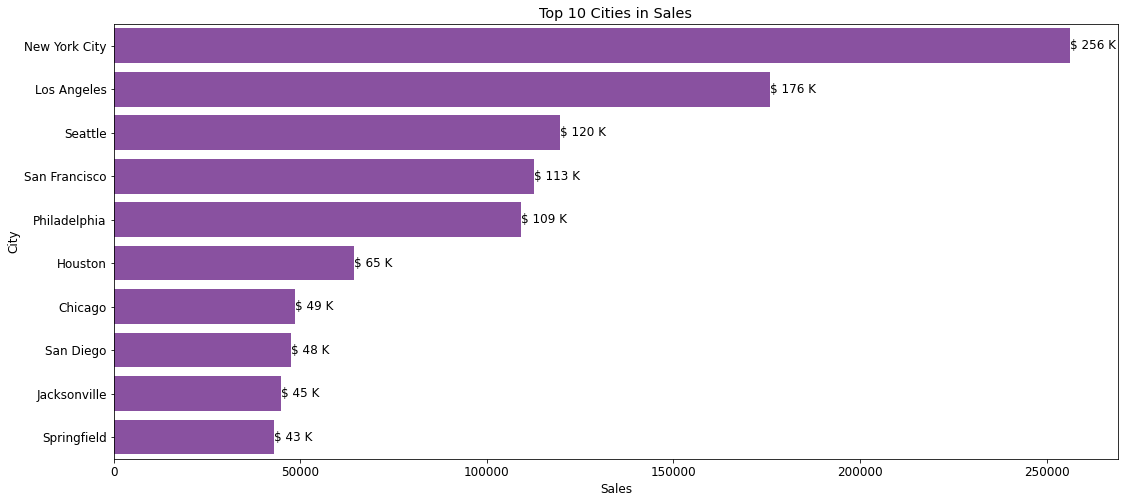

In [33]:
plt.rcParams['figure.figsize']=(18,8)
plt.rcParams.update({'font.size':12})
ax = sns.barplot(ct.Sales, ct.City, color='#8E44AD')
ax.set(title= 'Top 10 Cities in Sales')

for i in ax.patches:
    h = i.get_height()
    w = i.get_width()
    ax.text(x = w+3, y = i.get_y()+(h/2), s = ('$ ' + str(round(int(w)/1000)) + ' K'),va='center')


#### Segment wise Analysis

In [34]:
# Segment wise revenue 

sg = dataset.groupby('Segment')['Sales'].sum().sort_values(ascending=False).head(10)
sg = sg.reset_index()

# Generating the labels to show sales values in K
sg['Sales_K'] = ['$ ' + str(round(int(f)/1000)) + ' K' for f in sg.Sales]

sg

,Segment,Sales,Sales_K
0,Consumer,1.161401e+06,$ 1161 K
1,Corporate,7.061464e+05,$ 706 K
2,Home Office,4.296531e+05,$ 430 K


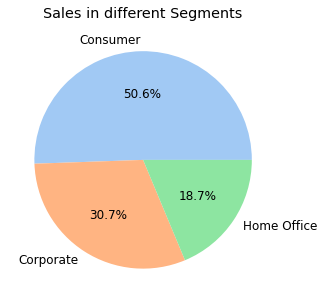

In [35]:
# Pie chart
plt.rcParams['figure.figsize']=(5,5)

colors = sns.color_palette('pastel')[0:5]
plt.pie(sg.Sales, labels = sg.Segment, colors = colors, autopct='%1.1f%%')

plt.title("Sales in different Segments")
plt.show()

#### Category wise Analysis

In [36]:
# Product Category wise revenue 

pc = dataset.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)
pc = pc.reset_index()

# Generating the labels to show sales values in K
pc['Sales_K'] = ['$ ' + str(round(int(f)/1000)) + ' K' for f in pc.Sales]

pc

,Category,Sales,Sales_K
0,Technology,836154.0330,$ 836 K
1,Furniture,741999.7953,$ 742 K
2,Office Supplies,719047.0320,$ 719 K


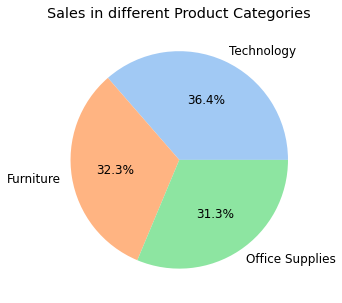

In [37]:
plt.rcParams['figure.figsize']=(5,5)

colors = sns.color_palette('pastel')
plt.pie(pc.Sales, labels = pc.Category, colors = colors, autopct='%1.1f%%')

plt.title("Sales in different Product Categories")
plt.show()

## Overall Analysis

- Discounts are one of the key factors for losses. So, it needs to be improved.
- The Home Office segment needs improvement.

Revenue wise Analysis:
- West Region is having the highest revenue with 725K and South Region has the lowest revenue with 329K
- Among the States, California generates the highest revenue of 458K followed by New York with 311K
- Among the Cities, New York City is the top city with a value of 256K followed by Los Angeles with a revenue of 176K
- From the 3 segments, Consumer goods are having the highest share in revenue with 1161K and Home Office have the lowest Share with 430K
- Also, among the product categories, Technological Products have the highest revenue with 36.4% share of 836K whereas Office Products have the lowest share in revenue with 31.3% share worth 430K.